In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


Import Modules 

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')


Load the dataset

In [5]:
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
#statistical info
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#datatype info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


to display count plot correctly 

In [9]:
# print(df['Gender'].dtype)
df['Gender'] = df['Gender'].astype('category')


<Axes: xlabel='Gender', ylabel='count'>

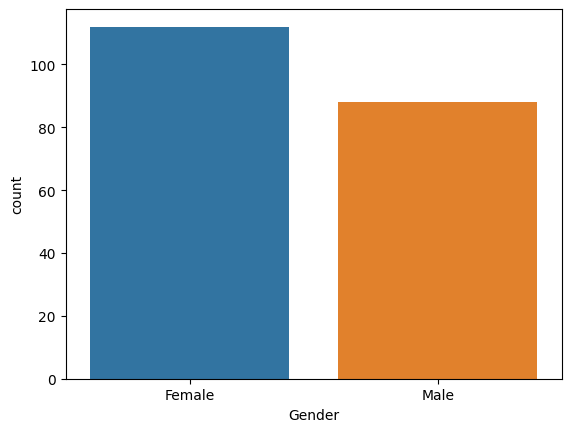

In [10]:
#exploratory data analysis 
sns.countplot(x='Gender', data=df)


<Axes: xlabel='Age', ylabel='Density'>

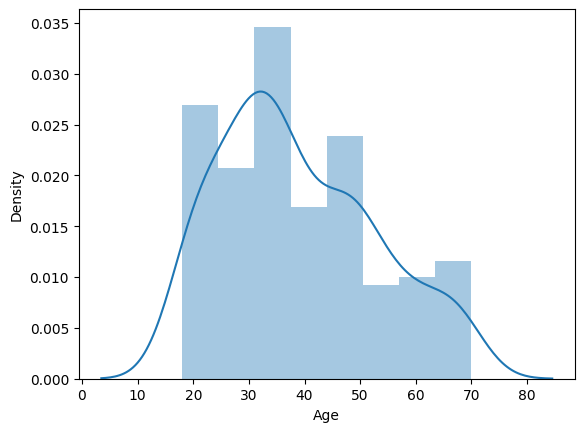

In [11]:
sns.distplot(df['Age'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

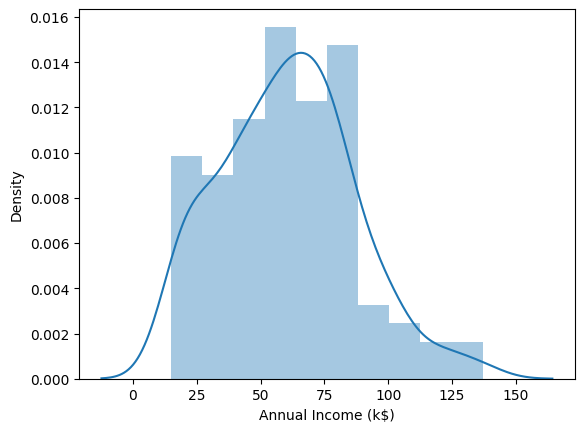

In [15]:
# print(df.columns)

sns.distplot(df['Annual Income (k$)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

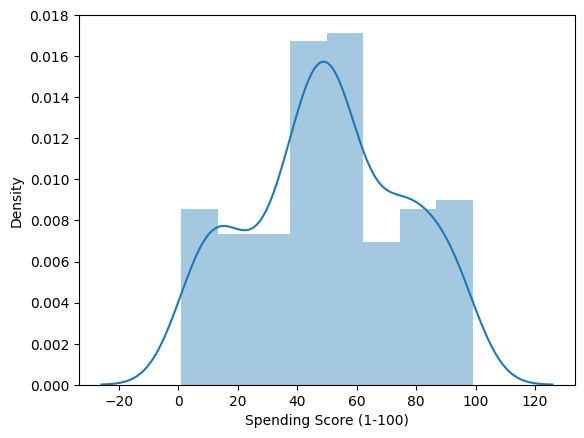

In [17]:
sns.distplot(df['Spending Score (1-100)'])

Correlation matrics

<Axes: >

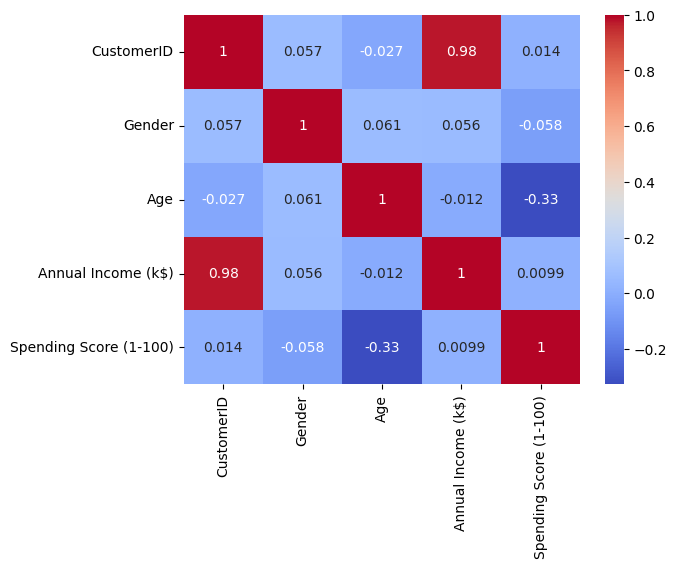

In [19]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0}) #convert categorical to numerical column
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')




Clustering


In [23]:
#cluster on 2 features 
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

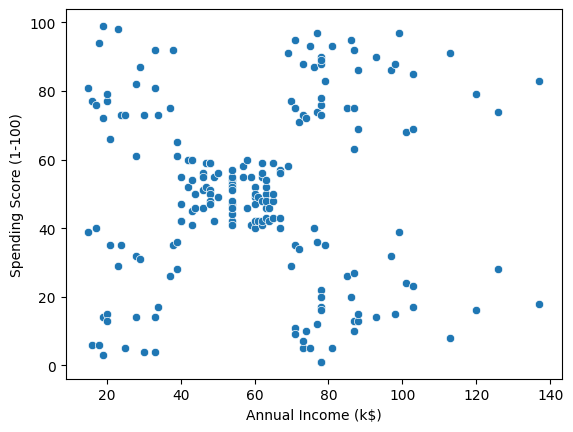

In [26]:
 
# Scatter plot
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df1)


K-Means

In [30]:
from sklearn.cluster import KMeans
# Sum of Squared errors
errors = []
for i in range(1,11): # 10 clusters
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    errors.append(kmeans.inertia_)

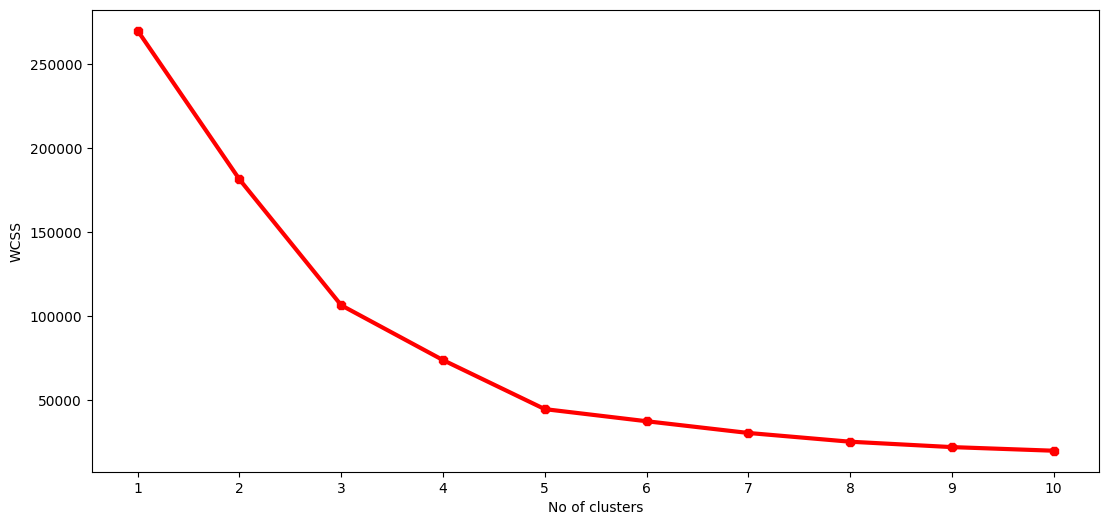

In [32]:
#plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3,color='red', marker='8' )
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [33]:
km = KMeans(n_clusters=5)
km.fit(df1)
y = km.predict(df1)
df1['Label'] = y
df1.head()

,Annual Income (k$),Spending Score (1-100),Label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

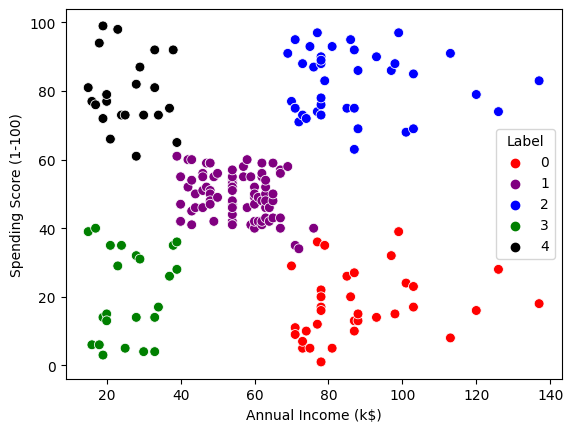

In [35]:
sns.scatterplot(x= 'Annual Income (k$)', y= 'Spending Score (1-100)', data=df1 , hue='Label' , s=50, palette= ['red', 'purple','blue', 'green', 'black'])

In [37]:
#cluster on 3 features 
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]
df2.head()

,Annual Income (k$),Spending Score (1-100),Age
0,15,39,19
1,15,81,21
2,16,6,20
3,16,77,23
4,17,40,31


In [39]:
errors = []
for i in range(1,11): # 10 clusters
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df2)
    errors.append(kmeans.inertia_)

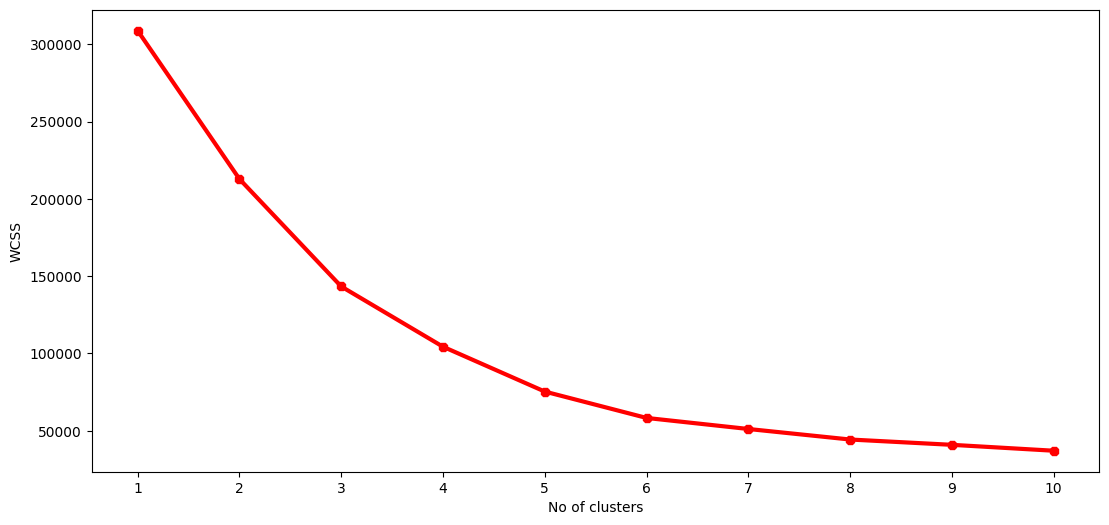

In [40]:
plt.figure(figsize=(13,6))
plt.plot(range(1,11), errors)
plt.plot(range(1,11), errors, linewidth=3,color='red', marker='8' )
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [41]:
km = KMeans(n_clusters=5)
km.fit(df2)
y = km.predict(df2)
df2['Label'] = y
df2.head()

,Annual Income (k$),Spending Score (1-100),Age,Label
0,15,39,19,1
1,15,81,21,0
2,16,6,20,1
3,16,77,23,0
4,17,40,31,1


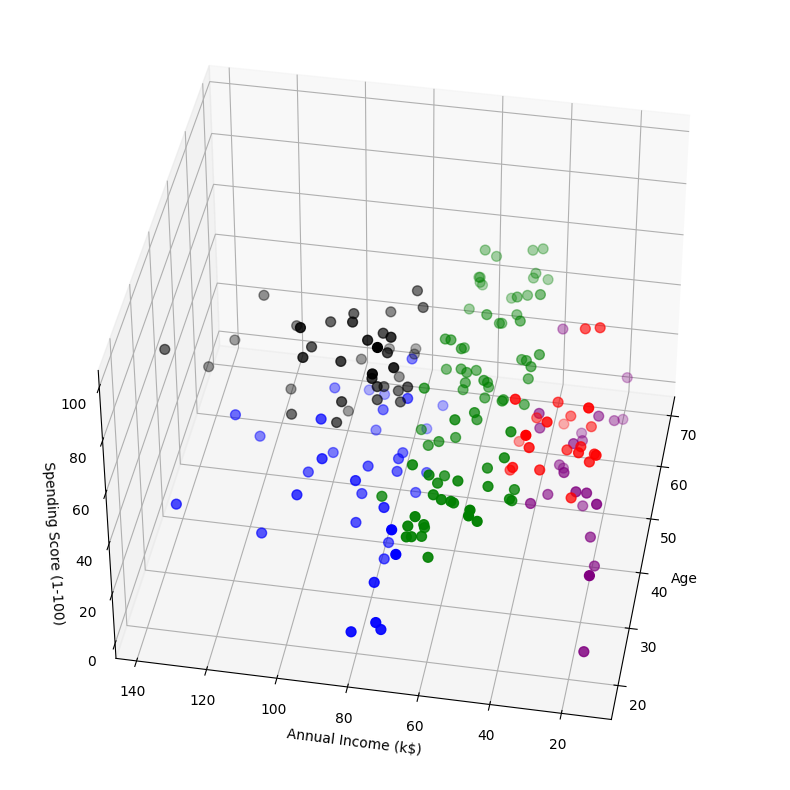

In [47]:
#3d scatter plot 
fig = plt.figure(figsize =(30,10))
ax = fig.add_subplot(111, projection= '3d')

ax.scatter(df2['Age'][df2['Label']==0], df2['Annual Income (k$)'][df2['Label']==0], df2['Spending Score (1-100)'][df2['Label']==0], c='red', s=50 )
ax.scatter(df2['Age'][df2['Label']==1], df2['Annual Income (k$)'][df2['Label']==1], df2['Spending Score (1-100)'][df2['Label']==1], c='purple', s=50 )
ax.scatter(df2['Age'][df2['Label']==2], df2['Annual Income (k$)'][df2['Label']==2], df2['Spending Score (1-100)'][df2['Label']==2], c='blue', s=50 )
ax.scatter(df2['Age'][df2['Label']==3], df2['Annual Income (k$)'][df2['Label']==3], df2['Spending Score (1-100)'][df2['Label']==3], c='green', s=50 )
ax.scatter(df2['Age'][df2['Label']==4], df2['Annual Income (k$)'][df2['Label']==4], df2['Spending Score (1-100)'][df2['Label']==4], c='black', s=50 )
ax.view_init(40,190) # to change orientation
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Average silhouette score: 0.44446409171786105


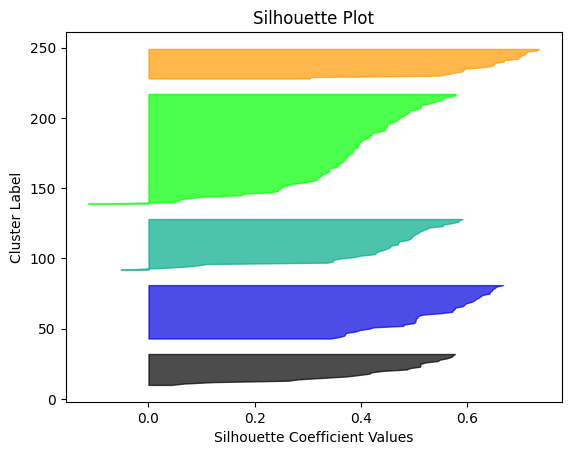

   Annual Income (k$)  Spending Score (1-100)        Age
0           26.304348               20.913043  45.217391
1           86.538462               82.128205  32.692308
2           87.432432               18.189189  40.324324
3           54.822785               49.835443  43.126582
4           25.727273               79.363636  25.272727


In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd

# Step 1: Perform Clustering
n_clusters = 5  # Number of clusters determined from silhouette analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df2 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]  # Features used for clustering
cluster_labels = kmeans.fit_predict(df2)

# Step 2: Silhouette Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Compute silhouette scores
sample_silhouette_values = silhouette_samples(df2, cluster_labels)
silhouette_avg = silhouette_score(df2, cluster_labels)
print(f"Average silhouette score: {silhouette_avg}")

# Visualize silhouette scores
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7
    )
    y_lower = y_upper + 10
ax.set_title("Silhouette Plot")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
plt.show()

# Step 3: Create Cluster Centers DataFrame
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'])
print(cluster_centers)


**Cluster Analysis**

In [56]:
from sklearn.cluster import KMeans
import pandas as pd

# Example of performing K-Means clustering
n_clusters = 5  # Number of clusters used
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]  # Features used for clustering
cluster_labels = kmeans.fit_predict(df1)

# Create a DataFrame for cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Annual Income (k$)', 'Spending Score (1-100)', 'Age'])
print(cluster_centers)



   Annual Income (k$)  Spending Score (1-100)        Age
0           26.304348               20.913043  45.217391
1           86.538462               82.128205  32.692308
2           87.432432               18.189189  40.324324
3           54.822785               49.835443  43.126582
4           25.727273               79.363636  25.272727


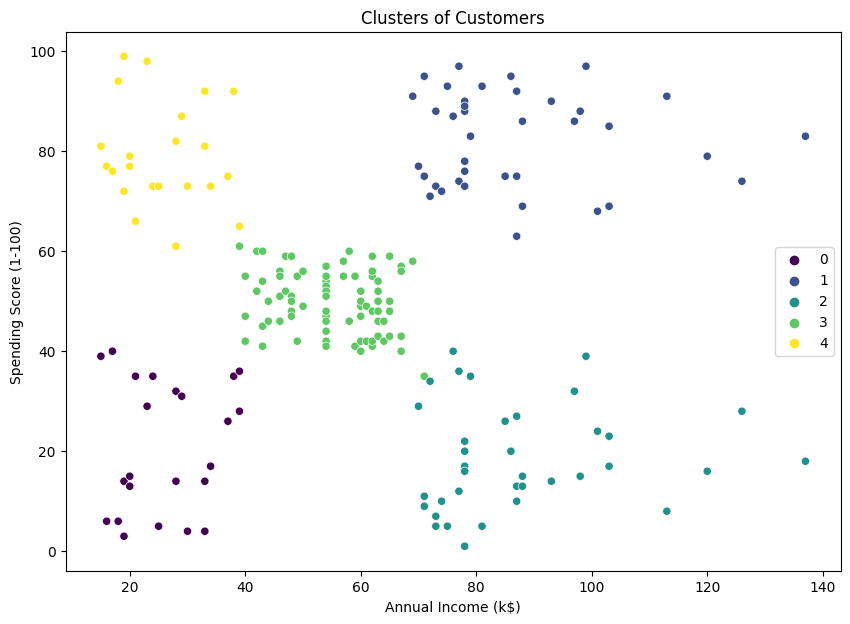

In [57]:
# Scatter plot with cluster labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=cluster_labels, data=df1, palette='viridis')
plt.title('Clusters of Customers')
plt.show()
